<a href="https://colab.research.google.com/github/mikeboyle321/Macromolecular_Engineering_Nanoparticle_Transport/blob/main/debye_huckel_surface_potentials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Charged surfaces in Electrolyte Solutions

*   Debye Huckel Theory



In [6]:
# import key packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Initialize variables

In [7]:
kb = 1.38064852E-23 # J/K, boltzmann constant
lambda_char = 100*1E-9 # m, 100 nm characteristic retardation wavelength ~ ionization wavelength
e_0 = 8.85418782E-12 # F/m
e_r = 78.4 # relative permittivity of water
e_coulomb = 1.602176634E-19 # C 
T = 298 # K
Na = 6.022E23 #/mol, Avogadro

In [53]:
kT = kb*T
c_s = 0.01 # M
z_s = 1 # NaCl
debye_param_calc = np.sqrt(2*(1000*c_s*Na*e_coulomb**2*z_s**2)/(e_0*e_r*kb*T)) # m^-1
debye_legnth_m = 1/debye_param_calc
debye_legnth_nm = debye_legnth_m*1E9
print("Debye Legnth =", debye_legnth_nm, "nm")
# sigma = 0.12 # C/m^2
# phi_stern_V = sigma*stern_layer_m/(e_0*e_r)
# phi_stern_mV = phi_stern_V*1E3

Debye Legnth = 3.0393892787498658 nm


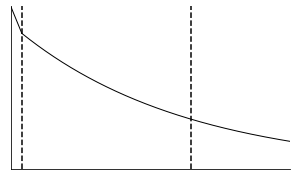

In [54]:
xlength = 5
phi_surface_mV = 30
phi_stern_mV = 25
phi_stern_V = phi_stern_mV*1E-3
stern_layer_nm = 0.2
stern_layer_m = stern_layer_nm*1E-9 
x_stern_nm = np.linspace(0, stern_layer_nm, 10000)
x_stern_m = x_stern_nm*1E-9
phi_x_stern = phi_surface_mV + ((phi_stern_mV - phi_surface_mV)/(stern_layer_nm))*x_stern_nm
x_nm = np.linspace(stern_layer_nm, xlength, 1000)
x_m = x_nm*1E-9
phi_x_V = phi_stern_V*np.exp(-debye_param_calc*(x_m- stern_layer_m))
phi_x_mV = phi_x_V*1E3
fig, ax = plt.subplots(figsize = (5,3))
ax.plot(x_stern_nm, phi_x_stern, 'k', linewidth=1)
ax.plot(x_nm ,phi_x_mV, 'k', linewidth=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_xlim([0,xlength])
ax.set_ylim([0,30])
ax.vlines(x=debye_legnth_nm + stern_layer_nm, ymin=0, ymax=30, linestyles='dashed', colors='k')
ax.vlines(x=stern_layer_nm, ymin=0, ymax=30, linestyles='dashed', colors='k')
fig.savefig('surface_potential.svg')

In [55]:
rho_cl = c_s*np.exp(z_s*e_coulomb*phi_x_V/kT)
rho_na = c_s*np.exp(-z_s*e_coulomb*phi_x_V/kT)

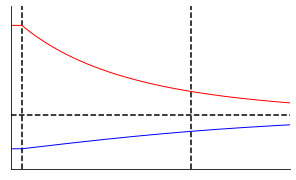

In [64]:
fig2, ax2 = plt.subplots(figsize = (5,3))
ax2.plot(x_stern_nm, np.full(x_stern_nm.shape, rho_cl[0]), 'r', linewidth=1)
ax2.plot(x_stern_nm, np.full(x_stern_nm.shape, rho_na[0]), 'b', linewidth=1)
ax2.vlines(x=stern_layer_nm, ymin=0, ymax=30, linestyles='dashed', colors='k')
ax2.plot(x_nm ,rho_cl, 'r', linewidth=1)
ax2.plot(x_nm,rho_na, 'b', linewidth=1)
ax2.hlines(y=c_s, xmin=0, xmax=xlength, linestyles ='dashed', colors='k')
ax2.vlines(x=debye_legnth_nm + stern_layer_nm, ymin=0, ymax=0.03, linestyles='dashed', colors='k')
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
ax2.set_xlim([0,xlength])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlim([0,xlength])
ax2.set_ylim([0,0.03])
fig2.savefig('ionconentration.svg')